In [ ]:
import astroquery
from astroquery.simbad import Simbad
from astroquery.jplhorizons import Horizons
from astropy import coordinates
import astropy.units as u
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd

In [30]:
ra_start = '03h37m50.16s' # hh mm ss
dec_start = '+05d21m08.0s' # dd mm ss

c = coordinates.SkyCoord("03h37m50.16s", "+05d21m08.0s", frame='icrs')
print(c)
r = 5 * u.arcminute
result_table = Simbad.query_region(c, radius=r)
result_table.pprint(show_unit=True, max_width=80, max_lines=8)

<SkyCoord (ICRS): (ra, dec) in deg
    (54.459, 5.35222222)>
          MAIN_ID                  RA      ... SCRIPT_NUMBER_ID
                                "h:m:s"    ...                 
---------------------------- ------------- ... ----------------
      FIRST J033754.1+051739 03 37 54.1005 ...                1
Gaia DR3 3275199054698971136 03 38 02.1539 ...                1


179.6540918281518 -38.32353419349484
-59.00736454234161 40.91291351780525


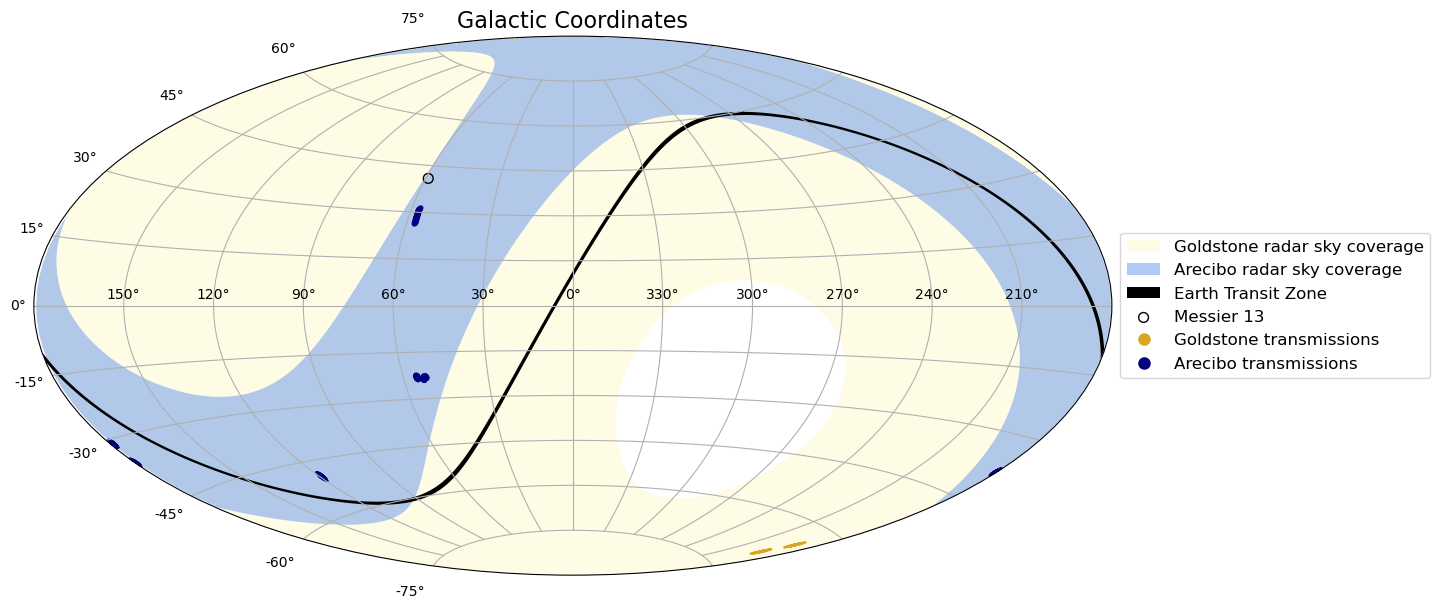

In [ ]:
lons = np.arange(360)
lats = np.zeros_like(lons)
lats_up = lats+0.528
lats_down = lats-0.528

def eq2gal(ra, dec):
    
    '''
    Transforms equatorial coordinates to galactic ones.
    Then prepares them for matplotlib aitoff projection. 
    '''
    
    eq = coordinates.SkyCoord(ra, dec, unit=u.deg)
    gal = eq.galactic

    # Minus appears because of “mapping from the inside” issue
    l_gal, b_gal = -gal.l.wrap_at(180*u.deg).radian, gal.b.radian
    
    return l_gal, b_gal

def ecl2gal(lon_ecl, lat_ecl):
    
    '''
    Transforms ecliptic coordinates to galactic ones.
    Then prepares them for matplotlib aitoff projection.
    '''
    
    ecl = coordinates.SkyCoord(lon_ecl, lat_ecl, unit=u.deg, frame='barycentricmeanecliptic')
    gal = ecl.transform_to('galactic')

    # Minus appears because of “mapping from the inside” issue
    l_gal, b_gal = -gal.l.wrap_at(180*u.deg).radian, gal.b.radian
    
    return l_gal, b_gal

# Ecliptic plane
lon_ecl = np.linspace(0, 360, 360)
lat_ecl = np.zeros(360)

lon_eq = np.linspace(0, 360, 360)
#lon_eq = np.zeros(360)
lat_eq = np.zeros(360)

l_ecl_gal, b_ecl_gal = ecl2gal(lon_ecl, lat_ecl)
l_ecl_gal_up, b_ecl_gal_up = ecl2gal(lon_ecl, lat_ecl+0.528)
l_ecl_gal_down, b_ecl_gal_down = ecl2gal(lon_ecl, lat_ecl-0.528)

l_eq_gal, b_eq_gal = eq2gal(lon_eq, lat_eq+36+27/60)
l_eq_gal_up, b_eq_gal_up = eq2gal(lon_eq, lat_eq+38)
l_eq_gal_down, b_eq_gal_down = eq2gal(lon_eq, lat_eq-1)

l_eq_gal_goldstone, b_eq_gal_goldstone = eq2gal(lon_eq, lat_eq+35+25/60-90)

# for idx, i in enumerate(np.linspace(-1, 38, 10)):
#     leq, beq = eq2gal(lon_eq, lat_eq+i)
#     sign_change = np.diff(np.sign(leq))
#     #print(np.round(leq*360/2/np.pi))
#     #eqs = -np.argmin(np.abs(leq*360/2/np.pi-180))
#     eqs = -np.where(sign_change != 0)[0][0] - 1
#     print(eqs)
#     leq = np.roll(leq, eqs)
#     beq = np.roll(beq, eqs)
#     print(np.round(leq*360/2/np.pi))
#     #if np.round(leq[0]*360/2/np.pi)==180.:
#     #    leq = np.roll(leq, -1)
#     plt.plot(leq*360/2/np.pi, beq*360/2/np.pi, label=f'{np.round(i)}')
#     if idx == 9:
#         print(np.round(leq*360/2/np.pi))
# plt.legend()
# plt.show()


lt, bt = eq2gal(np.zeros(100)+16.67*360/24, np.linspace(-1, 38, 100))
lt2, bt2 = eq2gal(np.zeros(100)+54.459, np.linspace(-1, 38, 100))

#xx = np.array([(q+180)%360 - 180 for q in l_eq_gal])[:-1]
ecl_shift = -np.argmax(l_ecl_gal)
ecl_shift_up = -np.argmax(l_ecl_gal_up)
ecl_shift_down = -np.argmax(l_ecl_gal_down)
eq_shift = -np.argmax(l_eq_gal)
eq_shift_down = -np.argmax(l_eq_gal_down)
eq_shift_up = -np.argmax(l_eq_gal_up)-1
eq_diff = np.max(l_eq_gal) - l_eq_gal[0]
eq_shift_goldstone = -np.argmax(l_eq_gal_goldstone)
l_ecl_gal = np.roll(l_ecl_gal, ecl_shift)
l_ecl_gal_up = np.roll(l_ecl_gal_up, ecl_shift_up)
l_ecl_gal_down = np.roll(l_ecl_gal_down, ecl_shift_down)
b_ecl_gal_up = np.roll(b_ecl_gal_up, ecl_shift_up)
b_ecl_gal_down = np.roll(b_ecl_gal_down, ecl_shift_down)
l_eq_gal = np.roll(l_eq_gal, eq_shift)
l_eq_gal_up = np.roll(l_eq_gal_up, eq_shift_up)
l_eq_gal_down = np.roll(l_eq_gal_down, eq_shift_down)
b_eq_gal_up = np.roll(b_eq_gal_up, eq_shift_up)
b_eq_gal = np.roll(b_eq_gal, eq_shift)
b_eq_gal_down = np.roll(b_eq_gal_down, eq_shift_down)
l_eq_gal_goldstone = np.roll(l_eq_gal_goldstone, eq_shift_goldstone)
b_eq_gal_goldstone = np.roll(b_eq_gal_goldstone, eq_shift_goldstone)

#plt.plot(l_eq_gal*360/2/np.pi)
#plt.plot(b_eq_gal*360/2/np.pi)
#plt.scatter(l_eq_gal*360/2/np.pi, b_eq_gal*360/2/np.pi)
#print(np.round(l_ecl_gal*360/2/np.pi))
#print(np.round(l_eq_gal*360/2/np.pi))

ld, bd = eq2gal(54.459, 5.35222222)
print(ld*360/2/np.pi, bd*360/2/np.pi)
m13ra = '16h41m41.24s'
m13dec = '+36d27m35.5s'
lm13, bm13 = eq2gal(m13ra, m13dec)
print(lm13*360/2/np.pi, bm13*360/2/np.pi)

leq1, leq2 = np.split(l_eq_gal_up, np.where(np.diff(np.sign(l_eq_gal_up))==2)[0]+1)
beq1, beq2 = np.split(b_eq_gal_up, np.where(np.diff(np.sign(l_eq_gal_up))==2)[0]+1)

# plt.fill_between(l_eq_gal_down*360/2/np.pi, b_eq_gal_down*360/2/np.pi, np.zeros_like(l_eq_gal_down)+90, alpha=0.5, color='cornflowerblue', lw=0, label='Arecibo radar visibility')
# plt.plot(leq1*360/2/np.pi, beq1*360/2/np.pi, c='k')
# plt.plot(leq2*360/2/np.pi, beq2*360/2/np.pi, c='k')
# plt.plot(l_eq_gal_down*360/2/np.pi, b_eq_gal_down*360/2/np.pi, c='k')
# plt.plot(lt*360/2/np.pi, bt*360/2/np.pi, c='r')
# plt.plot(lt2*360/2/np.pi, bt2*360/2/np.pi, c='r')
# plt.scatter(lm13*360/2/np.pi, bm13*360/2/np.pi, c='k')
# plt.scatter(ld*360/2/np.pi, bd*360/2/np.pi, c='k')
# plt.title('Galactic coordinates')
# plt.xlabel('not quite l')
# plt.ylabel('b')
# plt.show()

# df11 = pd.read_csv('voyager_1_1st_month_horizons_results.txt', sep='\s+',
#                  names=['Date','Time','RAh','RAm','RAs','DECd','DECm','DECs','distance','ddot','galL','galB'], 
#                  skiprows=1)
# df12 = pd.read_csv('voyager_1_1day_horizons_results.txt', sep='\s+',
#                  names=['Date','Time','RAh','RAm','RAs','DECd','DECm','DECs','distance','ddot','galL','galB'], 
#                  skiprows=1)
# df1 = pd.concat([df11, df12], ignore_index=True, sort=False)

# v1_gal_l = []
# v1_gal_b = []
# for i in range(len(df1['Date'].values)):
#     ra = f'{(df1["RAh"].values[i]+12)%24}h{df1["RAm"].values[i]}m{df1["RAs"].values[i]}s'
#     dec = f'{-(df1["DECd"].values[i])}d{df1["DECm"].values[i]}m{df1["DECs"].values[i]}s'
#     if dec[0] != '-':
#         dec = '+'+dec
#     #print(i, ra, dec)
#     l, b = eq2gal(ra, dec)
#     v1_gal_l.append(l)
#     v1_gal_b.append(b)

# v1_gal_l = np.array(v1_gal_l)
# v1_gal_b = np.array(v1_gal_b)

# v1l1, v1l2 = np.split(v1_gal_l, np.where(np.diff(np.sign(v1_gal_l))==2)[0]+1)
# v1b1, v1b2 = np.split(v1_gal_b, np.where(np.diff(np.sign(v1_gal_l))==2)[0]+1)

# df21 = pd.read_csv('voyager_2_1st_month_horizons_results.txt', sep='\s+',
#                  names=['Date','Time','RAh','RAm','RAs','DECd','DECm','DECs','distance','ddot','galL','galB'], 
#                  skiprows=1)
# df22 = pd.read_csv('voyager_2_1day_horizons_results.txt', sep='\s+',
#                  names=['Date','Time','RAh','RAm','RAs','DECd','DECm','DECs','distance','ddot','galL','galB'], 
#                  skiprows=1)
# df2 = pd.concat([df21, df22], ignore_index=True, sort=False)

# v2_gal_l = []
# v2_gal_b = []
# for i in range(len(df2['Date'].values)):
#     ra = f'{(df2["RAh"].values[i]+12)%24}h{df2["RAm"].values[i]}m{df2["RAs"].values[i]}s'
#     dec = f'{-(df2["DECd"].values[i])}d{df2["DECm"].values[i]}m{df2["DECs"].values[i]}s'
#     if dec[0] != '-':
#         dec = '+'+dec
#     #print(i, ra, dec)
#     l, b = eq2gal(ra, dec)
#     v2_gal_l.append(l)
#     v2_gal_b.append(b)

# v2_gal_l = np.array(v2_gal_l)
# v2_gal_b = np.array(v2_gal_b)

# v2l1, v2l2, v2l3, v2l4 = np.split(v2_gal_l, np.where(np.diff(np.sign(v2_gal_l))!=0)[0]+1)
# v2b1, v2b2, v2b3, v2b4 = np.split(v2_gal_b, np.where(np.diff(np.sign(v2_gal_l))!=0)[0]+1)





plt.figure(figsize=(14,7))
ax = plt.subplot(111, projection='aitoff')

xfill = np.sort(np.concatenate([l_ecl_gal_up, l_ecl_gal_down]))
y1fill = np.interp(xfill, l_ecl_gal_up[::-1], b_ecl_gal_up[::-1])
y2fill = np.interp(xfill, l_ecl_gal_down[::-1], b_ecl_gal_down[::-1])

plt.fill_between(l_eq_gal_down, np.zeros_like(l_eq_gal_down)-np.pi+0.001, np.zeros_like(l_eq_gal_down)+np.pi-0.001, alpha=0.5, color='lemonchiffon', lw=0, label='Goldstone radar sky coverage')
plt.fill_between(l_eq_gal_goldstone, b_eq_gal_goldstone, np.zeros_like(l_eq_gal_goldstone)+np.pi-0.001, alpha=1, color='white', lw=0)

plt.fill_between(l_eq_gal_down, b_eq_gal_down, np.zeros_like(l_eq_gal_down)+np.pi-0.001, alpha=0.5, color='cornflowerblue', lw=0, label='Arecibo radar sky coverage')
plt.fill_between(leq1, beq1, np.zeros_like(leq1)+np.pi-0.001, alpha=1, color='white', lw=0)
plt.fill_between(leq2, beq2, np.zeros_like(leq2)+np.pi-0.001, alpha=1, color='white', lw=0)
plt.fill_between(leq1, beq1, np.zeros_like(leq1)+np.pi-0.001, alpha=0.5, color='lemonchiffon', lw=0)
plt.fill_between(leq2, beq2, np.zeros_like(leq2)+np.pi-0.001, alpha=0.5, color='lemonchiffon', lw=0)

#plt.fill_between(l_ecl_gal_down,b_ecl_gal_down,np.zeros_like(l_ecl_gal_down)+np.pi-0.001, color='darkslateblue', alpha=1, lw=0, label='Earth Transit Zone')
plt.fill_between(xfill,y1fill,y2fill, color='k', alpha=1, lw=0, label='Earth Transit Zone')

# plt.plot(v1l1, v1b1, c='goldenrod', label='Voyager 1 leakage path')
# plt.plot(v1l2, v1b2, c='goldenrod')
# plt.scatter(v1l1[222], v1b1[222], marker=r'$\text{J}$', s=80, c='saddlebrown', zorder=10)
# plt.scatter(v1l1[367], v1b1[367], marker=r'$\text{S}$', s=80, c='saddlebrown', zorder=10)

# plt.plot(v2l1, v2b1, c='lightcoral', label='Voyager 2 leakage path')
# plt.plot(v2l2, v2b2, c='lightcoral')
# plt.plot(v2l3, v2b3, c='lightcoral')
# plt.plot(v2l4, v2b4, c='lightcoral')
# plt.scatter(v2l2[209-45], v2b2[209-45], marker=r'$\text{J}$', s=80, c='maroon', zorder=10)
# plt.scatter(v2l2[341-45], v2b2[341-45], marker=r'$\text{S}$', s=80, c='maroon', zorder=10)
# plt.scatter(v2l2[1544-45], v2b2[1544-45], marker=r'$\text{U}$', s=80, c='maroon', zorder=10)
# plt.scatter(v2l3[2853-45-1798], v2b3[2853-45-1798], marker=r'$\text{N}$', s=80, c='maroon', zorder=10)
#plt.fill_between(l_ecl_gal_up,b_ecl_gal_up,np.zeros_like(l_ecl_gal_up)+np.pi-0.001, color='white', alpha=1, lw=0)
#plt.plot(leq1, beq1, color='k')
#plt.plot(leq2, beq2, color='k')
#plt.plot(l_eq_gal_down, b_eq_gal_down, color='k')
#plt.scatter(ld, bd, marker='o', c='navy', s=50, label='Arecibo transmissions')
#print((lm13-eq_diff)*360/2/np.pi)
#q = (lm13-eq_diff)*360/2/np.pi
#q1 = (q+180)%360 - 180
#print(q1)
plt.scatter(lm13, bm13, marker='o', facecolors='none', edgecolors='k', alpha=1, s=50, lw=1, label='Messier 13')

df = pd.read_csv('planetary_radar_data.csv')
from astroquery.jplhorizons import Horizons

arecibo_counter = 0
goldstone_counter = 0
#gold_coords = '35°25′36″N 116°53′24″W'
gold_coords = {'lon': -(116+53/60+24/3600) * u.deg,
                     'lat': (35+25/60+36/3600) * u.deg,
                     'elevation': 0.900 * u.km}

for i in range(len(df)):
    obs = df['Observatory'].values[i]
    if obs == 'Goldstone':
        obs = gold_coords
        goldstone_counter += 1
    else:
        arecibo_counter += 1
    target = df['Target'].values[i]
    start = f'{df["UT Date"].values[i]} {df["UT Start Time"].values[i]}'
    stop = f'{df["UT Date"].values[i]} {df["UT Stop Time"].values[i]}'
    obj = Horizons(id=target, location=obs,
               epochs={'start':start, 'stop':stop,
                       'step':'10m'})
    eph = obj.ephemerides()
    ra_vec = eph['RA'].data
    dec_vec = eph['DEC'].data
    l_vec, b_vec = eq2gal(ra_vec, dec_vec)
    if obs == gold_coords:
        col = 'goldenrod'
        if goldstone_counter == 1:
            #plt.scatter(l_vec, b_vec, c=col, label='Goldstone transmissions')
            circles = [plt.Circle((xi,yi), radius=1/60, linewidth=0, fc=col) for xi,yi in zip(l_vec,b_vec)]
            c = matplotlib.collections.PatchCollection(circles, color=col)
            ax.add_collection(c)
        else:
            circles = [plt.Circle((xi,yi), radius=1/60, linewidth=0, fc=col) for xi,yi in zip(l_vec,b_vec)]
            c = matplotlib.collections.PatchCollection(circles, color=col)
            ax.add_collection(c)
    if obs == 'Arecibo':
        col = 'navy'
        if arecibo_counter == 1:
            #plt.scatter(l_vec, b_vec, c=col, label='Arecibo transmissions')
            circles = [plt.Circle((xi,yi), radius=1/60, linewidth=0, fc=col) for xi,yi in zip(l_vec,b_vec)]
            c = matplotlib.collections.PatchCollection(circles, color=col)
            ax.add_collection(c)
        else:
            circles = [plt.Circle((xi,yi), radius=1/60, linewidth=0, fc=col) for xi,yi in zip(l_vec,b_vec)]
            c = matplotlib.collections.PatchCollection(circles, color=col)
            ax.add_collection(c)

#plt.scatter(190*2*np.pi/360, 95*2*np.pi/360, c='navy', label='Arecibo transmissions')

handles, labels = plt.gca().get_legend_handles_labels() # get existing handles and labels
#empty_patch = mpatches.Patch(color='none', label='Extra label') # create a patch with no color
navy_circle = mlines.Line2D([], [], color='navy', marker='o', linestyle='None',
                          markersize=8)
gold_circle = mlines.Line2D([], [], color='goldenrod', marker='o', linestyle='None',
                          markersize=8)

handles.append(gold_circle)  # add new patches and labels to list
handles.append(navy_circle)
labels.append('Goldstone transmissions')
labels.append('Arecibo transmissions')



# Essential thing is to rename RA axis ticks to transform them to conventional format
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', \
                   '330°', '300°', '270°', '240°', '210°'])
#plt.xlim(-np.pi, np.pi)


plt.grid(True)
plt.legend(handles, labels, fontsize=12, bbox_to_anchor=(1.0, 0.5), loc='center left')

plt.title('Galactic Coordinates', fontsize='16')
plt.savefig('Arecibo_Goldstone_radar.pdf', bbox_inches='tight')
plt.show()

In [338]:
df = pd.read_csv('planetary_radar_data.csv')
df

,Observatory,Target,Target Type,UT Date,UT Start Time,UT Stop Time,Pt [kW],Mode,Code Length [bits?],Gal. Latitude,Gal. Longitude,ADS Link to Paper
0,Goldstone,Didymos (primary body),main-belt asteroid,2003-11-14,05:17:59,05:33:31,450,C,NaN,NaN,NaN,https://ui.adsabs.harvard.edu/abs/2020Icar..34...
1,Goldstone,Didymos (primary body),main-belt asteroid,2003-11-14,05:57:16,06:04:34,450,I,127.0,NaN,NaN,https://ui.adsabs.harvard.edu/abs/2020Icar..34...
2,Goldstone,Didymos (primary body),main-belt asteroid,2003-11-14,07:05:06,07:14:06,450,I,127.0,NaN,NaN,https://ui.adsabs.harvard.edu/abs/2020Icar..34...
3,Goldstone,Didymos (primary body),main-belt asteroid,2003-11-14,07:50:59,08:09:45,450,I,127.0,NaN,NaN,https://ui.adsabs.harvard.edu/abs/2020Icar..34...
4,Goldstone,Didymos (primary body),main-belt asteroid,2003-11-14,08:29:38,09:11:24,450,I,127.0,NaN,NaN,https://ui.adsabs.harvard.edu/abs/2020Icar..34...
5,Goldstone,Didymos (primary body),main-belt asteroid,2003-11-15,04:43:59.5,04:59:50.5,450,C,NaN,NaN,NaN,https://ui.adsabs.harvard.edu/abs/2020Icar..34...
6,Goldstone,Didymos (primary body),main-belt asteroid,2003-11-15,05:29:50.5,06:37:38.5,450,I,127.0,NaN,NaN,https://ui.adsabs.harvard.edu/abs/2020Icar..34...
7,Goldstone,Didymos (primary body),main-belt asteroid,2003-11-15,07:27:34.5,07:38:24.5,450,I,127.0,NaN,NaN,https://ui.adsabs.harvard.edu/abs/2020Icar..34...
8,Goldstone,Didymos (primary body),main-belt asteroid,2003-11-15,09:10:58.5,09:30:10.5,450,I,127.0,NaN,NaN,https://ui.adsabs.harvard.edu/abs/2020Icar..34...
9,Arecibo,Didymos (primary body),main-belt asteroid,2003-11-23,03:00:33.5,03:09:38.5,450,C,NaN,NaN,NaN,https://ui.adsabs.harvard.edu/abs/2020Icar..34...


In [354]:
from astroquery.jplhorizons import Horizons
obj = Horizons(id='Didymos (primary body)', location='Arecibo',
               epochs={'start':'2003-11-15', 'stop':'2003-11-16',
                       'step':'60arcsec'})
eph = obj.ephemerides()
print(eph['DEC'].data)

ValueError: Query failed without known error message; received the following response:
API VERSION: 1.2
API SOURCE: NASA/JPL Horizons API

*******************************************************************************
JPL/HORIZONS              65803 Didymos (PRIMARY BODY center)         920065803
Updated: 2024-Mar-01       Solution (s542) date: 2023-Sep-19
 
This is the DART mission's post-impact reconstructed trajectory for the 
Didymos -primary- of the 65803 Didymos system. 

To use Didymos (the primary) as coordinate origin, set center to "@ 920065803".

 Related objects:
  DART spacecraft           :      -135 (mission navigation)
  LICIACube spacecraft      :      -210 (mission navigation)
  Didymos system barycenter :  20065803 (JPL s205 reconstruction)
                                 65803; (latest JPL ground-based solution)
  Dimorphos satellite center: 120065803 (JPL s542 target reconstruction)

 Didymos physical parameters:
  Radii   ~ (0.39167 x 0.39167 x 0.29195) km, 710.3 m volume equivalent diam.
  Volume  ~ 0.1876 km^3
  GM_Didy ~ 3.48961E-08 km^3/s^2

 Didymos spin pole (ICRF at J2000.0 epoch, east longitude positive)
  RA  =  69.32686 deg. (310.0 deg. ecliptic longitude)   
  DEC = -72.72455 deg. (-80.6 deg. ecliptic latitude)
  PM  =   0.0     deg., 3823.008849557522 deg/day 
         (period is 2.2600 +/- 0.0001 hrs)

DART impacted Didymos' satellite (Dimorphos) on 26-Sep-2022 @ 23:14:24.183 UTC,
equivalent to 2022-Sep-26 23:15:33.365359 TDB. 

 Name                                     Start (TDB)        Stop (TDB)
 ---------------------------------------  -----------------  -----------------
 didymos_system_s542_v01                  2000-Jan-01 00:00  2024-Dec-31 00:00
*******************************************************************************

Unknown units specification -- re-enter


In [384]:
for i in range(len(df)):
    obs = df['Observatory'].values[i]
    if obs == 'Arecibo':
        continue
    gold_coords = {'lon': -(116+53/60+24/3600) * u.deg,
                     'lat': (35+25/60+36/3600) * u.deg,
                     'elevation': 0.900 * u.km}
    obs = gold_coords
    target = df['Target'].values[i]
    start = f'{df["UT Date"].values[i]} {df["UT Start Time"].values[i]}'
    stop = f'{df["UT Date"].values[i]} {df["UT Stop Time"].values[i]}'
    obj = Horizons(id=target, location=obs,
               epochs={'start':start, 'stop':stop,
                       'step':'1'})
    eph = obj.ephemerides()
    l_vec = eph['GlxLon'].data
    b_vec = eph['GlxLat'].data
    print(eph['GlxLat'].data)

[-69.259618 -69.219475]
[-69.158106 -69.139239]
[-68.98255 -68.959193]
[-68.863225 -68.814212]
[-68.762124 -68.6521]
[-65.392877 -65.351751]
[-65.274021 -65.098545]
[-64.969072 -64.940917]
[-64.698784 -64.648114]


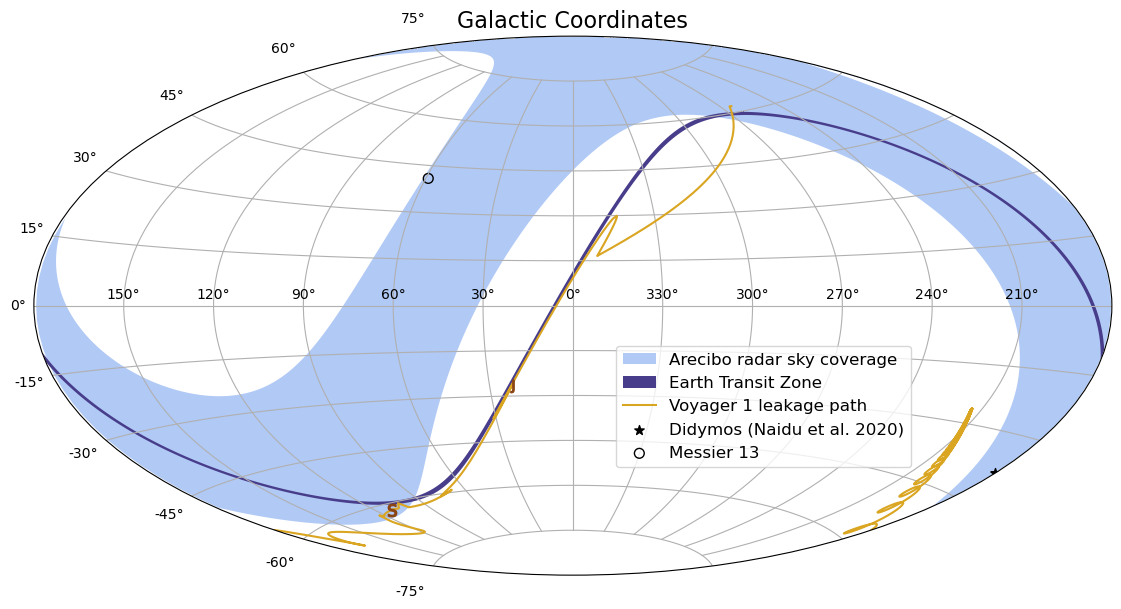

In [292]:
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')

xfill = np.sort(np.concatenate([l_ecl_gal_up, l_ecl_gal_down]))
y1fill = np.interp(xfill, l_ecl_gal_up[::-1], b_ecl_gal_up[::-1])
y2fill = np.interp(xfill, l_ecl_gal_down[::-1], b_ecl_gal_down[::-1])
plt.fill_between(l_eq_gal_down, b_eq_gal_down, np.zeros_like(l_eq_gal_down)+np.pi-0.001, alpha=0.5, color='cornflowerblue', lw=0, label='Arecibo radar sky coverage')
plt.fill_between(leq1, beq1, np.zeros_like(leq1)+np.pi-0.001, alpha=1, color='white', lw=0)
plt.fill_between(leq2, beq2, np.zeros_like(leq2)+np.pi-0.001, alpha=1, color='white', lw=0)
#plt.fill_between(l_ecl_gal_down,b_ecl_gal_down,np.zeros_like(l_ecl_gal_down)+np.pi-0.001, color='darkslateblue', alpha=1, lw=0, label='Earth Transit Zone')
plt.fill_between(xfill,y1fill,y2fill, color='darkslateblue', alpha=1, lw=0, label='Earth Transit Zone')

plt.plot(v1l1, v1b1, c='goldenrod', label='Voyager 1 leakage path')
plt.plot(v1l2, v1b2, c='goldenrod')
plt.scatter(v1l1[222], v1b1[222], marker=r'$\text{J}$', s=80, c='saddlebrown', zorder=10)
plt.scatter(v1l1[367], v1b1[367], marker=r'$\text{S}$', s=80, c='saddlebrown', zorder=10)
#plt.plot(v1l1[661:1661+500], v1b1[661:1661+500], c='navy')
#plt.plot(v1l2[:661], v1b2[:661], c='firebrick')
#plt.plot(v2l1, v2b1, c='firebrick', label='Voyager 2 leakage path')
#plt.plot(v2l2, v2b2, c='firebrick')
#plt.plot(v2l3, v2b3, c='firebrick')
#plt.plot(v2l4, v2b4, c='firebrick')

#plt.fill_between(l_ecl_gal_up,b_ecl_gal_up,np.zeros_like(l_ecl_gal_up)+np.pi-0.001, color='white', alpha=1, lw=0)
#plt.plot(leq1, beq1, color='k')
#plt.plot(leq2, beq2, color='k')
#plt.plot(l_eq_gal_down, b_eq_gal_down, color='k')
plt.scatter(ld, bd, marker='*', c='k', s=50, label='Didymos (Naidu et al. 2020)')
#print((lm13-eq_diff)*360/2/np.pi)
#q = (lm13-eq_diff)*360/2/np.pi
#q1 = (q+180)%360 - 180
#print(q1)
plt.scatter(lm13, bm13, marker='o', facecolors='none', edgecolors='k', alpha=1, s=50, lw=1, label='Messier 13')

# Essential thing is to rename RA axis ticks to transform them to conventional format
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', \
                   '330°', '300°', '270°', '240°', '210°'])
#plt.xlim(-np.pi, np.pi)


plt.grid(True)
plt.legend(fontsize=12, loc=(0.54, 0.20))

plt.title('Galactic Coordinates', fontsize='16')

plt.show()

In [297]:
print([len(i) for i in np.split(v2_gal_l, np.where(np.diff(np.sign(v2_gal_l))!=0)[0]+1)])

[45, 1798, 3098, 13006]
